In [2]:
# 📦 Install and download libraries
!pip install -q spacy
import nltk
nltk.download('stopwords')
!python -m spacy download en_core_web_sm



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# 📚 Import libraries
import pandas as pd
import string
import spacy
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
# 🧠 Load NLP tools
stop_words = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")


In [5]:
# 📂 Load the dataset (make sure spam.csv is uploaded)
df = pd.read_csv("/content/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# 🧹 Text Preprocessing
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.text not in string.punctuation and token.text not in stop_words and token.is_alpha]
    return " ".join(tokens)

df['cleaned_message'] = df['message'].apply(preprocess_text)


In [11]:
# 🔡 TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = df['label'].values


In [10]:
# 🚂 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# 🤖 Model Training
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.9614349775784753

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



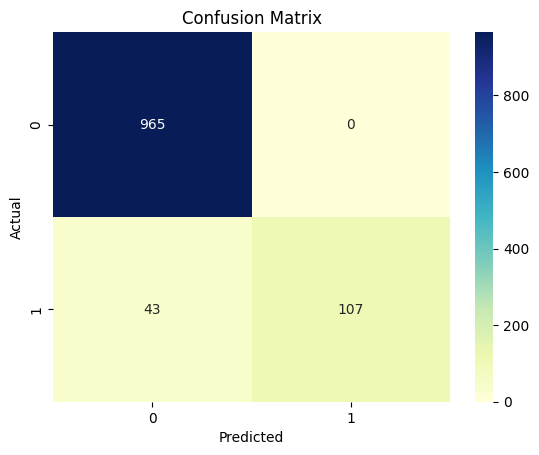

In [14]:
# 📊 Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [24]:
def predict_message(message):
    cleaned = preprocess_text(message)
    vector = tfidf.transform([cleaned]).toarray()
    prediction = model.predict(vector)[0]
    return "Spam" if prediction == 1 else "Ham (Not Spam)"

user_input = input("Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,")
result = predict_message(user_input)
print(f"\n👉 Prediction: {result}")

KeyboardInterrupt: Interrupted by user

In [26]:
import pickle

# Save TF-IDF vectorizer and model
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("spam_classifier_model.pkl", "wb") as f:
    pickle.dump(model, f)



In [27]:
# app.py

import streamlit as st
import pickle
import spacy
import string

# Load pre-trained NLP tools
nlp = spacy.load("en_core_web_sm")

# Load vectorizer and model
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("spam_classifier_model.pkl", "rb") as f:
    model = pickle.load(f)

# Preprocessing function
def preprocess_text(text):
    stopwords = spacy.lang.en.stop_words.STOP_WORDS
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.text not in string.punctuation and token.text not in stopwords and token.is_alpha]
    return " ".join(tokens)

# Streamlit UI
st.set_page_config(page_title="Spam Classifier", page_icon="📩")
st.title("📩 Spam Message Classifier")
st.write("Enter a message below to check whether it's spam or not.")

user_input = st.text_area("Enter your message here")

if st.button("Classify"):
    if user_input.strip() == "":
        st.warning("Please enter a message!")
    else:
        cleaned = preprocess_text(user_input)
        vector = vectorizer.transform([cleaned]).toarray()
        prediction = model.predict(vector)[0]
        if prediction == 1:
            st.error("🚨 This message is SPAM!")
        else:
            st.success("✅ This message is NOT SPAM.")


ModuleNotFoundError: No module named 'streamlit'

In [29]:
!pip install streamlit

In [30]:
# app.py

import streamlit as st
import pickle
import spacy
import string

# Load pre-trained NLP tools
nlp = spacy.load("en_core_web_sm")

# Load vectorizer and model
with open("tfidf_vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)

with open("spam_classifier_model.pkl", "rb") as f:
    model = pickle.load(f)

# Preprocessing function
def preprocess_text(text):
    stopwords = spacy.lang.en.stop_words.STOP_WORDS
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.text not in string.punctuation and token.text not in stopwords and token.is_alpha]
    return " ".join(tokens)

# Streamlit UI
st.set_page_config(page_title="Spam Classifier", page_icon="📩")
st.title("📩 Spam Message Classifier")
st.write("Enter a message below to check whether it's spam or not.")

user_input = st.text_area("Enter your message here")

if st.button("Classify"):
    if user_input.strip() == "":
        st.warning("Please enter a message!")
    else:
        cleaned = preprocess_text(user_input)
        vector = vectorizer.transform([cleaned]).toarray()
        prediction = model.predict(vector)[0]
        if prediction == 1:
            st.error("🚨 This message is SPAM!")
        else:
            st.success("✅ This message is NOT SPAM.")


2025-07-05 11:05:42.035 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 11:05:42.041 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 11:05:42.431 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-05 11:05:42.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 11:05:42.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 11:05:42.443 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-05 11:05:42.447 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn